In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
# Colores para gráficos

LOW_DAMAGE_COLOR = "#fff25e"
MEDIUM_DAMAGE_COLOR = "#ffc45e"
SERIOUS_DAMAGE_COLOR = "#ff5e5e"
DAMAGE_COLOR_PALETTE = [LOW_DAMAGE_COLOR, MEDIUM_DAMAGE_COLOR, SERIOUS_DAMAGE_COLOR]

In [140]:
# Funciones para limpieza de datos

def set_categorical_columns(df):
    df_copy = df.copy()

    columns = [
        "land_surface_condition",
        "foundation_type",
        "roof_type",
        "ground_floor_type",
        "other_floor_type",
        "position",
        "plan_configuration",
        "legal_ownership_status",
    ]

    for column in columns:
        if column not in df:
            continue
        df_copy[column] = df[column].astype("category")

    return df_copy

def set_boolean_columns(df):
    df_copy = df.copy()
    
    for column in df:
        if column.startswith("has_"):
            df_copy[column] = df[column].astype(bool)
    
    return df_copy

In [141]:
# Lectura de datos

values = pd.read_csv("train_values.csv")
labels = pd.read_csv("train_labels.csv")
df = values.merge(labels, on="building_id")

## Análisis y limpieza del set de datos

Empezamos analizando los datos, para tener una idea preliminar de qué forma tienen.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Se puede ver que ninguna columna tiene valores nulos. Además, sabemos que varias columnas corresponden a variables categóricas y booleanas, por lo que podemos convertirlas al tipo correcto.

In [143]:
df = set_categorical_columns(df)
df = set_boolean_columns(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

## Existen zonas mas afectadas que otras?
Varias columnas del set de datos nos dan información sobre los materiales usados en las construcciones de las edificaciones. Esto puede ser una característica importante para determinar si un edificio sufrió un daño mayor o menor.

Primer acercamiento de alto nivel.

In [183]:
df_geo_1 = df_fmferro.loc[:,['geo_level_1_id','damage_grade']]
df_geo_1.groupby(['geo_level_1_id']).agg('mean').head()

,damage_grade
geo_level_1_id,
0,2.065320
1,1.960755
2,2.162191
3,2.331565
4,2.162136


In [184]:
df_geo_1 = df_fmferro.loc[:,['geo_level_1_id','damage_grade']]
df_geo_1.groupby(['geo_level_1_id']).agg('mean').head()

,damage_grade
geo_level_1_id,
0,2.065320
1,1.960755
2,2.162191
3,2.331565
4,2.162136


## Material usado en la construcción

Varias columnas del set de datos nos dan información sobre los materiales usados en las construcciones de las edificaciones. Esto puede ser una característica importante para determinar si un edificio sufrió un daño mayor o menor.

In [181]:
df_fmferro = df.loc[:,['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','damage_grade']]
df_fmferro_general = df.loc[:,['geo_level_1_id','geo_level_2_id','geo_level_3_id','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','damage_grade']]
df_fmferro.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,damage_grade
0,802906,6,487,12198,True,True,False,False,False,False,False,False,3
1,28830,8,900,2812,False,True,False,False,False,False,False,False,2
2,94947,21,363,8973,False,True,False,False,False,False,False,False,3
3,590882,22,418,10694,False,True,False,False,False,False,True,True,2
4,201944,11,131,1488,True,False,False,False,False,False,False,False,3


## Existe relacion entre el material de construcción y el daño?
A continuación mostramos algunos datos que nos hacen pensar que existe una relación directa entre el tipo de material de las superestructuras y los daños recibidos. 

Habiendo una tendencia a recibir daños por encima de la media para contrucciones de adobe y barro. Y por debajo para edificaciones mas resistentes como concreto o ladrillo. 

Text(0, 0.5, 'Cantidad')

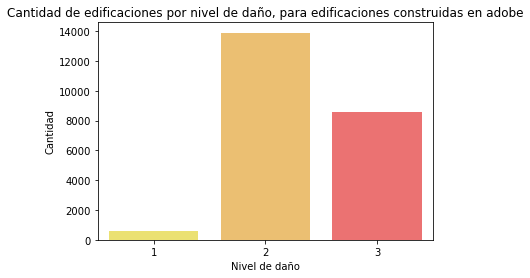

In [158]:
has_superstructure_adobe_mud =\
    df[(df["has_superstructure_adobe_mud"] == 1)]
ax = sns.countplot(data=has_superstructure_adobe_mud, x="damage_grade", palette=DAMAGE_COLOR_PALETTE)
ax.set_title("Cantidad de edificaciones por nivel de daño, para edificaciones construidas en adobe")
ax.set_xlabel("Nivel de daño")
ax.set_ylabel("Cantidad")

Vemos una tendencia de las edificaciones construidas en adobe a estar por arriba del promedio de daño. Por lo que podría haber una relacion entre el daño y este material a simple vista.

Saquemos un promedio del daño ocacionado a las estructuras de adobe.

In [159]:
df[(df["has_superstructure_adobe_mud"] == 1)]['damage_grade'].mean()
has_superstructure_adobe_mud =df[(df["has_superstructure_adobe_mud"] == 1)]['damage_grade'].mean()

Media de daño recibido para las superestructuras de adobe.

In [160]:
has_superstructure_adobe_mud


2.3467815246093244

Text(0, 0.5, 'Cantidad')

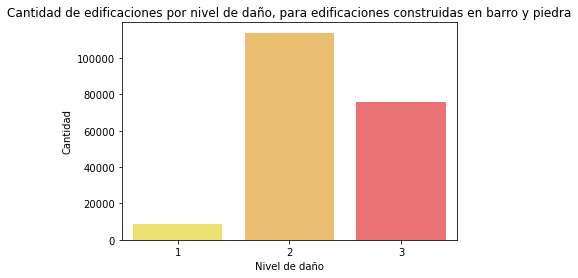

In [161]:
has_superstructure_mud_mortar_stone =\
    df[(df["has_superstructure_mud_mortar_stone"] == 1)]
ax = sns.countplot(data=has_superstructure_mud_mortar_stone, x="damage_grade", palette=DAMAGE_COLOR_PALETTE)
ax.set_title("Cantidad de edificaciones por nivel de daño, para edificaciones construidas en barro y piedra")
ax.set_xlabel("Nivel de daño")
ax.set_ylabel("Cantidad")

In [162]:
df[(df["has_superstructure_mud_mortar_stone"] == 1)]['damage_grade'].mean()
has_superstructure_mud_mortar_stone =df[(df["has_superstructure_mud_mortar_stone"] == 1)]['damage_grade'].mean()
has_superstructure_mud_mortar_stone

2.337901199127724

Text(0, 0.5, 'Cantidad')

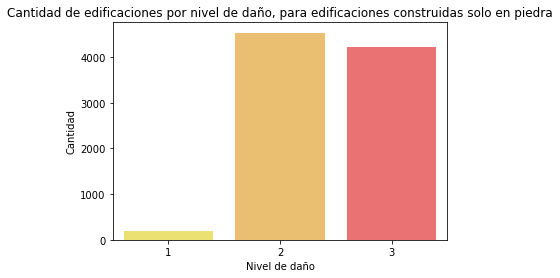

In [163]:
has_superstructure_stone_flag =\
    df[(df["has_superstructure_stone_flag"] == 1)]
ax = sns.countplot(data=has_superstructure_stone_flag, x="damage_grade", palette=DAMAGE_COLOR_PALETTE)
ax.set_title("Cantidad de edificaciones por nivel de daño, para edificaciones construidas solo en piedra")
ax.set_xlabel("Nivel de daño")
ax.set_ylabel("Cantidad")

In [164]:
df[(df["has_superstructure_stone_flag"] == 1)]['damage_grade'].mean()
has_superstructure_stone_flag =df[(df["has_superstructure_stone_flag"] == 1)]['damage_grade'].mean()
has_superstructure_stone_flag



2.4525539286911813

Text(0, 0.5, 'Cantidad')

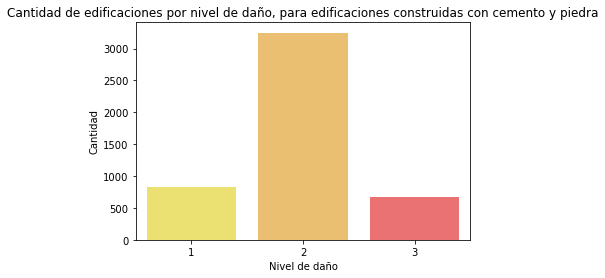

In [165]:
has_superstructure_cement_mortar_stone =\
    df[(df["has_superstructure_cement_mortar_stone"] == 1)]
ax = sns.countplot(data=has_superstructure_cement_mortar_stone, x="damage_grade", palette=DAMAGE_COLOR_PALETTE)
ax.set_title("Cantidad de edificaciones por nivel de daño, para edificaciones construidas con cemento y piedra")
ax.set_xlabel("Nivel de daño")
ax.set_ylabel("Cantidad")

In [166]:
df[(df["has_superstructure_cement_mortar_stone"] == 1)]['damage_grade'].mean()
has_superstructure_cement_mortar_stone =df[(df["has_superstructure_cement_mortar_stone"] == 1)]['damage_grade'].mean()
has_superstructure_cement_mortar_stone

1.9675925925925926

Al incluir cemento en la preparación de la edificación notamos que el promedio de daño bajo por debajo de la media. Lo que puede indicar que haya una relación directa entre los materiales y sus distintas combinaciones y el daño recibido.

Text(0, 0.5, 'Cantidad')

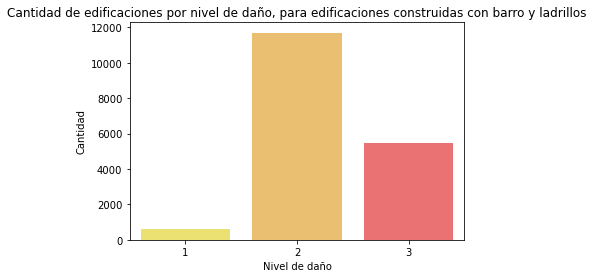

In [167]:
has_superstructure_mud_mortar_brick =\
    df[(df["has_superstructure_mud_mortar_brick"] == 1)]
ax = sns.countplot(data=has_superstructure_mud_mortar_brick, x="damage_grade", palette=DAMAGE_COLOR_PALETTE)
ax.set_title("Cantidad de edificaciones por nivel de daño, para edificaciones construidas con barro y ladrillos")
ax.set_xlabel("Nivel de daño")
ax.set_ylabel("Cantidad")

In [168]:
has_superstructure_mud_mortar_brick =df[(df["has_superstructure_mud_mortar_brick"] == 1)]['damage_grade'].mean()
has_superstructure_mud_mortar_brick

2.271212206519903

Nuevamente vemos un aumento en el daño promedio al incorporar materiales menos resistentes como barro, pero en combinación con ladrillo parece que baja un poco el daño en comparación con barro y piedra, aunque la diferencia sea pequeña.

Text(0, 0.5, 'Cantidad')

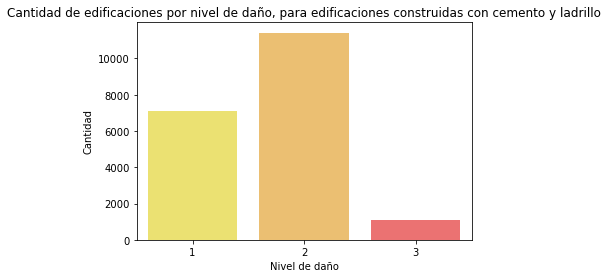

In [169]:
has_superstructure_cement_mortar_brick =\
    df[(df["has_superstructure_cement_mortar_brick"] == 1)]
ax = sns.countplot(data=has_superstructure_cement_mortar_brick, x="damage_grade", palette=DAMAGE_COLOR_PALETTE)
ax.set_title("Cantidad de edificaciones por nivel de daño, para edificaciones construidas con cemento y ladrillo")
ax.set_xlabel("Nivel de daño")
ax.set_ylabel("Cantidad")

In [170]:
has_superstructure_cement_mortar_brick =df[(df["has_superstructure_cement_mortar_brick"] == 1)]['damage_grade'].mean()
has_superstructure_cement_mortar_brick

1.6932959469793525

Text(0, 0.5, 'Cantidad')

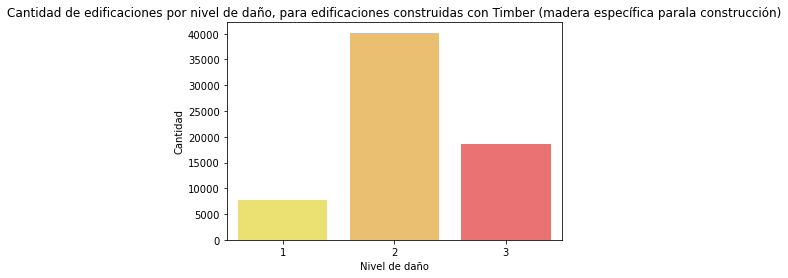

In [171]:
has_superstructure_timber =\
    df[(df["has_superstructure_timber"] == 1)]
ax = sns.countplot(data=has_superstructure_timber, x="damage_grade", palette=DAMAGE_COLOR_PALETTE)
ax.set_title("Cantidad de edificaciones por nivel de daño, para edificaciones construidas con Timber (madera específica parala construcción)")
ax.set_xlabel("Nivel de daño")
ax.set_ylabel("Cantidad")

In [172]:
has_superstructure_timber =df[(df["has_superstructure_timber"] == 1)]['damage_grade'].mean()
has_superstructure_timber

2.165221971407073

Extrañamente, las edificaciones construidas en madera para contruccion no tuvieron tanto daño como se hubiera pensado, aunque siguen por encima de la media.

Text(0, 0.5, 'Cantidad')

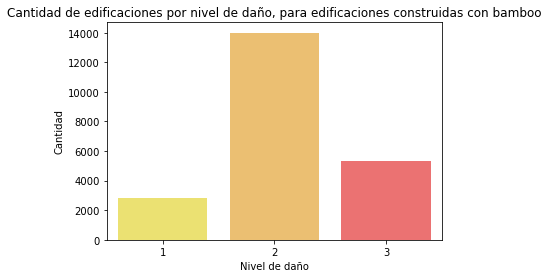

In [173]:
has_superstructure_bamboo =\
    df[(df["has_superstructure_bamboo"] == 1)]
ax = sns.countplot(data=has_superstructure_bamboo, x="damage_grade", palette=DAMAGE_COLOR_PALETTE)
ax.set_title("Cantidad de edificaciones por nivel de daño, para edificaciones construidas con bamboo")
ax.set_xlabel("Nivel de daño")
ax.set_ylabel("Cantidad")

In [174]:
has_superstructure_bamboo =df[(df["has_superstructure_bamboo"] == 1)]['damage_grade'].mean()
has_superstructure_bamboo

2.111717974180735

Busquemos comparar los daños promedio de las superestructuras en una unica tabla, para ver si encontramos que se agrupan segun el material en algun rango. 

In [175]:
superestructures = df_fmferro_general.loc[:,['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','damage_grade']]
superestructures

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,damage_grade
0,True,True,False,False,False,False,False,False,3
1,False,True,False,False,False,False,False,False,2
2,False,True,False,False,False,False,False,False,3
3,False,True,False,False,False,False,True,True,2
4,True,False,False,False,False,False,False,False,3
...,...,...,...,...,...,...,...,...,...
260596,False,True,False,False,False,False,False,False,2
260597,False,True,False,False,False,False,False,False,3
260598,False,True,False,False,False,False,False,False,3
260599,False,False,False,False,False,True,False,False,2


In [180]:
df_superestructures = pd.DataFrame({ 
    'Tipo de estructura':['adobe/barro','barro/piedra','piedra','cemento/piedra','barro/ladrillos','cemento/ladrillos','Timber','Bamboo(caña)'],
    'Daño promedio recibido':[has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo],
})
df_superestructures

,Tipo de estructura,Daño promedio recibido
0,adobe/barro,2.346782
1,barro/piedra,2.337901
2,piedra,2.452554
3,cemento/piedra,1.967593
4,barro/ladrillos,2.271212
5,cemento/ladrillos,1.693296
6,Timber,2.165222
7,Bamboo(caña),2.111718


In [189]:
df_superestructures['Tipo de estructura'].plot(kind='bar',figsize=(15,5),title='Cantidad de juegos por categoria',color='coral')

TypeError: no numeric data to plot